# Classification (Complaint-Status)

In [2]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import nltk
import re
import codecs
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [3]:
###Loading the Train and Test Dataset
train = pd.read_csv('C:/Users/HP/Desktop/DataVsualisation/converted_data_train.csv')
test = pd.read_csv('C:/Users/HP/Desktop/DataVsualisation/converted_data_test.csv')

# Exploring The Dataset

In [4]:
print("Training Dataset Shape:")
print(train.shape)
print("\n")
print("Training Dataset Columns/Features:")
print(train.dtypes)

Training Dataset Shape:
(43266, 11)


Training Dataset Columns/Features:
Complaint-ID                  object
Date-received                 object
Transaction-Type              object
Complaint-reason              object
Company-response              object
Date-sent-to-company          object
Complaint-Status              object
Consumer-disputes             object
Consumer-complaint-summary    object
converted_text                object
convertion_language           object
dtype: object


In [5]:
#Viewing the top few entries of Training Dataset
train.head()

Complaint-ID Date-received         Transaction-Type  \
0         Tr-1    11/11/2015                 Mortgage   
1         Tr-2      7/7/2015         Credit reporting   
2         Tr-3      5/7/2015  Bank account or service   
3         Tr-4    11/12/2016          Debt collection   
4         Tr-5     9/29/2016              Credit card   

                           Complaint-reason  \
0  Loan servicing, payments, escrow account   
1    Incorrect information on credit report   
2                 Using a debit or ATM card   
3     Cont'd attempts collect debt not owed   
4                            Payoff process   

                                    Company-response Date-sent-to-company  \
0                                                NaN           11/11/2015   
1   Company chooses not to provide a public response             7/7/2015   
2                                                NaN             5/7/2015   
3  Company believes it acted appropriately as aut...           11/12/2016   
4  Company has responded to the consumer and the ...            9/29/2016   

                  Complaint-Status Consumer-disputes  \
0          Closed with explanation               Yes   
1  Closed with non-monetary relief                No   
2          Closed with explanation                No   
3          Closed with explanation                No   
4          Closed with explanation                No   

                          Consumer-complaint-summary  \
0  Seterus, Inc a déposé un faux rapport auprès d...   
1  XX / XX / XXXX La requête en faillite n ° XXXX...   
2  El XXXX / XXXX / 15, estaba preparando el vuel...   
3  The loan was paid in XXXX XXXX. In XXXX, 4 yea...   
4  J'ai obtenu un compte de crédit de soins pour ...   

                                      converted_text convertion_language  
0  Seterus, Inc. filed a false report with the ma...                  fr  
1  XX / XX / XXXX Bankruptcy Claim XXXX of Chapte...                  fr  
2  XXXX / XXXX / 15, I was preparing the flight b...                  es  
3  The loan was paid in XXXX XXXX. In XXXX, 4 yea...                  en  
4  I got a care credit account for XXXX. Immediat...                  fr

In [6]:
print("Test Dataset Shape:")
print(test.shape)
print("\n")
print("Test Dataset Columns/Features:")
print(test.dtypes)


Test Dataset Shape:
(18543, 10)


Test Dataset Columns/Features:
Complaint-ID                  object
Date-received                 object
Transaction-Type              object
Complaint-reason              object
Company-response              object
Date-sent-to-company          object
Consumer-disputes             object
Consumer-complaint-summary    object
converted_text                object
convertion_language           object
dtype: object


In [7]:
#object: Object format means variables are categorical,text and date-time.

In [8]:
##Viewing the top few entries of Test Dataset
test.head()

Complaint-ID Date-received         Transaction-Type  \
0         Te-1     8/18/2016  Bank account or service   
1         Te-2     4/18/2016          Debt collection   
2         Te-3     3/23/2016         Credit reporting   
3         Te-4     6/26/2017             Student loan   
4         Te-5     5/13/2016         Credit reporting   

                          Complaint-reason  \
0  Account opening, closing, or management   
1                    Communication tactics   
2   Incorrect information on credit report   
3     Dealing with your lender or servicer   
4   Incorrect information on credit report   

                                    Company-response Date-sent-to-company  \
0  Company has responded to the consumer and the ...            8/18/2016   
1  Company believes it acted appropriately as aut...            4/20/2016   
2                                                NaN            3/23/2016   
3                                                NaN            6/26/2017   
4  Company has responded to the consumer and the ...            5/13/2016   

  Consumer-disputes                         Consumer-complaint-summary  \
0                No  XXXX / XXXX / 16 I called Citibank to open a c...   
1                No  I'm struggling financially. I called and I off...   
2                No  In XXXX of 2015, an automatic payment was conf...   
3               NaN  I submitted a request to XXXX, which is my cur...   
4                No  A state tax lien was filed against me XXXX / X...   

                                      converted_text convertion_language  
0  XXXX / XXXX / 16 I called Citibank to open a c...                  en  
1  I'm struggling financially. I called and I off...                  en  
2  In XXXX of 2015, an automatic payment was conf...                  en  
3  I submitted a request to XXXX, which is my cur...                  en  
4  A state tax lien was filed against me XXXX / X...                  en

In [9]:
#Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would 
#not lose the original datasets.
train_original=train.copy()
test_original=test.copy()

In [10]:
train.describe()

Complaint-ID Date-received Transaction-Type  \
count         43266         43266            43266   
unique        43266           920               18   
top         Tr-6999     1/19/2017  Debt collection   
freq              1           226            10422   

                              Complaint-reason  \
count                                    43266   
unique                                     150   
top     Incorrect information on credit report   
freq                                      4466   

                                         Company-response  \
count                                               20760   
unique                                                 10   
top     Company has responded to the consumer and the ...   
freq                                                10928   

       Date-sent-to-company         Complaint-Status Consumer-disputes  \
count                 43266                    43266             35568   
unique                  930                        5                 2   
top               1/19/2017  Closed with explanation                No   
freq                    182                    34300             27663   

                               Consumer-complaint-summary  \
count                                               43266   
unique                                              43022   
top     Equifax mishandled my information, which has l...   
freq                                                   13   

                                           converted_text convertion_language  
count                                               43226               43226  
unique                                              42928                   4  
top     Equifax mishandled my information, which has l...                  en  
freq                                                   13               27827

The features: 'Company-response' and 'Consumer-disputes' has missing values that needs to be handled.

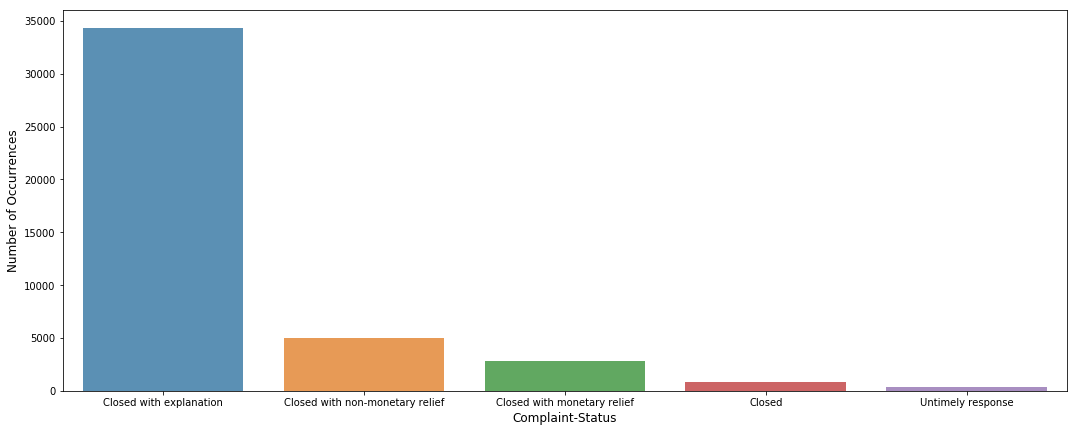

In [11]:
cnt_srs = train['Complaint-Status'].value_counts()

plt.figure(figsize=(18,7))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Complaint-Status', fontsize=12)
plt.show()


In [12]:
test.describe()

Complaint-ID Date-received Transaction-Type  \
count         18543         18543            18543   
unique        18543           914               18   
top        Te-14880     1/19/2017  Debt collection   
freq              1            92             4539   

                              Complaint-reason  \
count                                    18543   
unique                                     147   
top     Incorrect information on credit report   
freq                                      2039   

                                         Company-response  \
count                                                8842   
unique                                                 10   
top     Company has responded to the consumer and the ...   
freq                                                 4695   

       Date-sent-to-company Consumer-disputes  \
count                 18543             15239   
unique                  914                 2   
top               1/19/2017                No   
freq                     87             11824   

                               Consumer-complaint-summary  \
count                                               18543   
unique                                              18485   
top     I am filing this complaint because Equifax has...   
freq                                                    6   

                                           converted_text convertion_language  
count                                               18520               18520  
unique                                              18449                   4  
top     I am filing this complaint because Experian ha...                  en  
freq                                                    6               12028

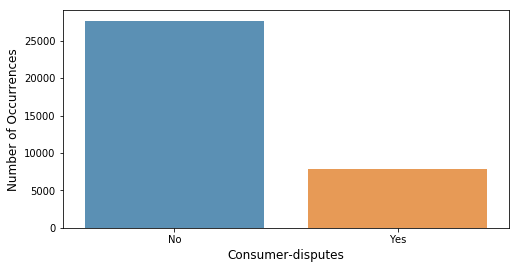

In [13]:
cnt_srs = train['Consumer-disputes'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Consumer-disputes', fontsize=12)
plt.show()


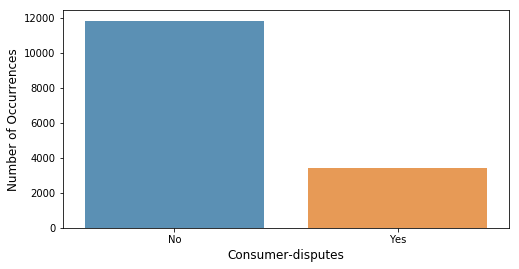

In [15]:
cnt_srs = test['Consumer-disputes'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Consumer-disputes', fontsize=12)
plt.show()

In [14]:
# Now Checking For Any Missing Values
print("Training Dataset Missing Value Columns:")
print(train.isnull().sum())
print("\n")
print("Test Dataset Missing Value Columns:")
print(test.isnull().sum())

Training Dataset Missing Value Columns:
Complaint-ID                      0
Date-received                     0
Transaction-Type                  0
Complaint-reason                  0
Company-response              22506
Date-sent-to-company              0
Complaint-Status                  0
Consumer-disputes              7698
Consumer-complaint-summary        0
converted_text                   40
convertion_language              40
dtype: int64


Test Dataset Missing Value Columns:
Complaint-ID                     0
Date-received                    0
Transaction-Type                 0
Complaint-reason                 0
Company-response              9701
Date-sent-to-company             0
Consumer-disputes             3304
Consumer-complaint-summary       0
converted_text                  23
convertion_language             23
dtype: int64


# Now Strategy To Tackle The Dataset (Data Preprocessing)

Complaint-ID:This Column has no null value neither in the Training set nor in the Test set, while exploring this feature I found out that each value is unique from the rest of all values, therefore I am not going to consider this feature for our model because it will not help our model to predict better.

Date-received:This Column tells us the date on which the complaint was registered.
Date-sent-to-company :This Column tells us the date on which the complaint was sent to company.
(These two features above are used later in order to derive a new feature i.e Delay in entertaining the Consumer-Complaint.)

Transaction-Type :There are 18 different types of transaction occured,which will now be converted into numerical form using LabelEncoding and One-hot Encoding for both training and test datasets.

Complaint-reason :This feature is a text feature that does not have any fixed number of categories. Hence I have converted the text into the corresponding Tf-idf vector.

Company-response :There are 22506 null values in training set and 9706 null values in test set. I have fill all the missing values using an unknown variable e.g 'Unknown'.This Column will then be converted into numerical form using LabelEncoding and then OneHotEncoding will be performed to ensure that none gets priority over another because of magnitude of LabelEncoded values.

Complaint-Status :This Column is the target variable.

Consumer-disputes :There are 7698 null values in training set and 3304 null values in test set.I will fill all the missing values using the Mode measure of central tendency of the dataset.i.e. 'No'
This is also a categorical feature which will be LabelEncoded.

Consumer-complaint-summary:This Column is Text feature.As,Text feature can not be given as input to the Machine Learning Model,so,I will Convert it into numerical form using Tfidf features.But,since it contains text in 3 different languages i.e. English('en'),Spanish('es'),French('fr') and the Converted text in English Language is present in 'converted_text' column which will be used for Tfidf features.

converted_text:This Column contains the converted text of 'Consumer-complaint-summary' into English language only.

convertion_language :This Column contains the languge of the text present in 'Consumer-complaint-summary' Column for specific index values as 'en','es' and 'fr'.

# Data Pre-Processing Steps

In [16]:
#The first step is to fill the null values in 'Converted_text' with a new value 'Unknown1'
values = {'converted_text':'Unknown1'}
train = train.fillna(value=values)
test = test.fillna(value=values)

In [17]:
#removing non-letter symbols and converting text in 'converted_text' to lowercase 
train['converted_text'] = train['converted_text'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]", '',str(x))))
test['converted_text'] = test['converted_text'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))
train['converted_text'] = train['converted_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['converted_text'] = test['converted_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [18]:
#Removing punctuations
#adding characters list which needs to remove that is PUNCTUATION
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'/','<','>','br','�','^','XX','XXXX','xxxx','xx']
#removing extra characters
train['converted_text'] = train['converted_text'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))
test['converted_text'] = test['converted_text'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))

In [19]:
#removal of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['converted_text'] = train['converted_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test['converted_text'] = test['converted_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [20]:
#common words removal
freq_train = pd.Series(' '.join(train['converted_text']).split()).value_counts()[:10]
freq_test = pd.Series(' '.join(test['converted_text']).split()).value_counts()[:10]
freq_train = list(freq_train.index)
train['converted_text'] = train['converted_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_train))
freq_test = list(freq_test.index)
test['converted_text'] = test['converted_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_test))

In [21]:
#rare words removal
freq_train_rare = pd.Series(' '.join(train['converted_text']).split()).value_counts()[-10:]
freq_train_rare = list(freq_train_rare.index)
train['converted_text'] = train['converted_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_train_rare))
freq_test_rare = pd.Series(' '.join(test['converted_text']).split()).value_counts()[-10:]
freq_test_rare = list(freq_test_rare.index)
test['converted_text'] = test['converted_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_test_rare))

In [22]:
#STEMMING
st = PorterStemmer()
train['converted_text']=train['converted_text'].apply(lambda x: " ".join([st.stem(w) for w in x.split()]))
test['converted_text']=test['converted_text'].apply(lambda x: " ".join([st.stem(w) for w in x.split()]))

In [39]:
def x_data(dataset):
    
    #filling missing values in 'Consumer-disputes with the mode'
    values = {'Consumer-disputes':'No'}
    dataset = dataset.fillna(value=values)
    
    #filling missing values in 'Company response with a new category'
    values1 = {'Company-response':'Unknown'}
    dataset = dataset.fillna(value=values1)
    
    
    a = dataset.describe()
    
    #drop the column having complaint-ID as it is of no importance
    dataset=dataset.drop(['Complaint-ID'], axis=1)
    dataset=dataset.drop(['Consumer-complaint-summary'], axis=1)
    
    #making a new feature delay with the help of two dates feature to know the date difference
    difference= []
    for i in range(len(dataset)):
        a = dataset['Date-sent-to-company'][i].split('/')
        b = dataset['Date-received'][i].split('/')
        difference.append(int(a[2])*365 + int(a[0])*30 + int(a[1]) - int(b[2])*365 -int(b[0])*30 -int(b[1]))
    dataset['delayed'] = difference
    dataset=dataset.drop(['Date-sent-to-company'], axis=1)
    dataset=dataset.drop(['Date-received'], axis=1)
    
    
    X = dataset.loc[:,['Transaction-Type','Complaint-reason','Company-response','Consumer-disputes','delayed','converted_text','convertion_language']]
    
    #LabelEncoding the categorical features
    labelencoder = LabelEncoder()
    labelencoder.fit(X.iloc[:,0].values)
    X.iloc[:,0]=labelencoder.transform(X.iloc[:,0])
    labelencoder.fit(X.iloc[:,2].values)
    X.iloc[:,2]=labelencoder.transform(X.iloc[:,2])
    labelencoder.fit(X.iloc[:,3].values)
    X.iloc[:,3]=labelencoder.transform(X.iloc[:,3])
    bhau=X.head()
    
    reason = X.iloc[:,[1]]
    summary =X.iloc[:,[5]] 
    conv_lang=X.iloc[:,[6]]
    X=X.drop(['Complaint-reason'], axis=1)
    X=X.drop(['converted_text'], axis=1)
    #X=X.drop(['Consumer-complaint-summary'], axis=1)
    X=X.drop(['convertion_language'], axis=1)
    bhau2=X.head()
    
    onehotencoder = OneHotEncoder(categorical_features = [0,1])
    X = onehotencoder.fit_transform(X).toarray()
    
    
    
    
    
    sc_x = MinMaxScaler()
    X = sc_x.fit_transform(X)
    return X, reason, summary, conv_lang

In [25]:
x,reason_train,summary_train,conv_language_train = x_data(train)  #train set

In [26]:
#NOw We will convert the target variable into LabelEncoder
y_train = train.loc[:,['Complaint-Status']]
labelencoder1 = LabelEncoder()
labelencoder1.fit(y_train.values)
y_train=labelencoder1.transform(y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
x1,reason_test,summary_test,conv_language_test = x_data(test)  #test set

In [29]:
#converting the reason into list
res_train = reason_train['Complaint-reason'].tolist()
res_test = reason_test['Complaint-reason'].tolist()

In [30]:
#converting the summary into list
sum_train = summary_train['converted_text'].tolist()
sum_test = summary_test['converted_text'].tolist()

In [31]:
#adding train and test list for reason
lis = res_train + res_test
#adding train and test list for summary
lis_summary =sum_train+sum_test

In [32]:
#Calling TFID vectorizer
tfv = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(lis)
print(tfv.vocabulary_)
print(tfv.idf_)

xtrain_tfv =  tfv.transform(res_train).toarray()
xtest_tfv = tfv.transform(res_test).toarray()
type(xtrain_tfv)


{'loan': 100, 'servicing': 159, 'payments': 125, 'escrow': 66, 'account': 0, 'incorrect': 86, 'information': 89, 'credit': 46, 'report': 145, 'using': 190, 'debit': 51, 'atm': 17, 'card': 26, 'cont': 42, 'attempts': 18, 'collect': 37, 'debt': 52, 'owed': 122, 'payoff': 126, 'process': 131, 'modification': 110, 'collection': 38, 'foreclosure': 76, 'problems': 130, 'caused': 28, 'funds': 79, 'low': 102, 'protection': 136, 'managing': 105, 'lease': 95, 'problem': 129, 'making': 103, 'false': 71, 'statements': 167, 'representation': 148, 'disclosure': 61, 'verification': 192, 'customer': 48, 'service': 156, 'relations': 143, 'improper': 83, 'use': 189, 'deposits': 57, 'withdrawals': 195, 'communication': 39, 'tactics': 171, 'settlement': 160, 'costs': 45, 'dealing': 50, 'lender': 97, 'servicer': 157, 'closing': 36, 'cancelling': 25, 'applying': 13, 'mortgage': 113, 'refinancing': 142, 'existing': 69, 'unable': 184, 'pay': 123, 'taking': 173, 'charged': 31, 'fees': 74, 'didn': 60, 'expect':

numpy.ndarray

In [33]:
#Fitting TFIDF on summary
tfv_sum = TfidfVectorizer(max_features=5000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv_sum.fit(lis_summary)
print(tfv_sum.vocabulary_)
print(tfv_sum.idf_)
xtrain_tfv_sum =  tfv_sum.transform(sum_train).toarray()
xtest_tfv_sum = tfv_sum.transform(sum_test).toarray()
type(xtrain_tfv_sum)


{'seteru': 3981, 'file': 1692, 'fals': 1620, 'major': 2581, 'bureau': 532, 'state': 4202, 'mortgag': 2787, 'late': 2421, 'receiv': 3564, 'repay': 3708, 'note': 2910, 'delay': 1117, 'assess': 272, 'accord': 36, 'term': 4425, 'condit': 851, 'contract': 905, 'unabl': 4610, 'new': 2862, 'home': 2041, 'action': 55, 'bankruptci': 365, 'claim': 718, 'chapter': 659, 'hawaii': 1981, 'includ': 2171, 'creditor': 993, 'unknown': 4675, 'assum': 280, 'paid': 3055, 'prepar': 3289, 'flight': 1725, 'funer': 1829, 'close': 742, 'rel': 3660, 'stay': 4211, 'hotel': 2068, 'airport': 123, 'leav': 2441, 'hire': 2031, 'dog': 1315, 'friend': 1807, 'refer': 3615, 'peopl': 3131, 'knew': 2392, 'watch': 4853, 'hous': 2071, 'pick': 3175, 'mail': 2574, 'care': 583, 'plant': 3200, 'given': 1867, 'person': 3150, 'key': 2380, 'return': 3793, 'got': 1886, 'realiz': 3541, 'debit': 1069, 'card': 579, 'use': 4739, 'make': 2582, 'approxim': 229, 'purchas': 3404, 'check': 674, 'capit': 572, 'immedi': 2121, 'stop': 4229, 'sin

numpy.ndarray

In [34]:
x_train = np.concatenate((x,xtrain_tfv,xtrain_tfv_sum),axis = 1)
x_test = np.concatenate((x1,xtest_tfv,xtest_tfv_sum),axis = 1)


# Applying the model: Best Accuracy is in the case of Logistic regression with solver as lbfgs and c=10

In [35]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1, algorithm='kd_tree')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


In [36]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='lbfgs',multi_class='multinomial',random_state=0,C=10)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)


In [37]:
ans = labelencoder1.inverse_transform(y_pred)
type(ans)
ans = pd.DataFrame(ans)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [38]:
id1=test.loc[:,['Complaint-ID']]
final_ans = [id1, ans]
final_ans = pd.concat(final_ans, axis=1)
final_ans.columns = ['Complaint-ID', 'Complaint-Status']
final_ans.to_csv('submission_logistic_6-12_knn.csv',index=False)